# Projecting Regional GDP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

import psycopg2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-k4i6b7t4 because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('~/cpt5/capstone/data/processed/'
            '2000-20_regional_gdp.csv')

In [3]:
df.head()

,Region,Year,Type,Gross Regional Domestic Product
0,NATIONAL CAPITAL REGION (NCR),2000,At current prices,1.237451e+09
1,CORDILLERA ADMINISTRATIVE REGION (CAR),2000,At current prices,9.044601e+07
2,REGION I (ILOCOS REGION),2000,At current prices,1.289450e+08
3,REGION II (CAGAYAN VALLEY),2000,At current prices,8.593798e+07
4,REGION III (CENTRAL LUZON),2000,At current prices,3.687868e+08


In [4]:
df.Region.value_counts()

NATIONAL CAPITAL REGION (NCR)                              105
REGION VII (CENTRAL VISAYAS)                               105
REGION XIII (Caraga)                                       105
REGION XII (SOCCSKSARGEN)                                  105
REGION XI (DAVAO REGION)                                   105
REGION X (NORTHERN MINDANAO)                               105
REGION IX (ZAMBOANGA PENINSULA)                            105
REGION VIII (EASTERN VISAYAS)                              105
REGION VI (WESTERN VISAYAS)                                105
CORDILLERA ADMINISTRATIVE REGION (CAR)                     105
REGION V (BICOL REGION)                                    105
MIMAROPA REGION                                            105
REGION IV-A (CALABARZON)                                   105
REGION III (CENTRAL LUZON)                                 105
REGION II (CAGAYAN VALLEY)                                 105
REGION I (ILOCOS REGION)                               

In [5]:
df.Type.value_counts()

At current prices                         357
At constant 2018 prices                   357
Implicit Price Index                      357
Percent Share, At Current Prices          357
Percent Share, At Constant 2018 Prices    357
Name: Type, dtype: int64

In [6]:
# Get the current prices 
df_current = df[df.Type=='At current prices']

In [7]:
df_current.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [8]:
df_current.head()

,Region,Year,Type,Gross Regional Domestic Product
0,NATIONAL CAPITAL REGION (NCR),2000,At current prices,1.237451e+09
1,CORDILLERA ADMINISTRATIVE REGION (CAR),2000,At current prices,9.044601e+07
2,REGION I (ILOCOS REGION),2000,At current prices,1.289450e+08
3,REGION II (CAGAYAN VALLEY),2000,At current prices,8.593798e+07
4,REGION III (CENTRAL LUZON),2000,At current prices,3.687868e+08


In [9]:
# get only 2010-2020
df_current = df_current[df_current['Year'] >= 2010]

In [10]:
labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

df_current['Region'].unique()

array(['NATIONAL CAPITAL REGION (NCR)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)',
       'REGION I (ILOCOS REGION)', 'REGION II (CAGAYAN VALLEY)',
       'REGION III (CENTRAL LUZON)', 'REGION IV-A (CALABARZON)',
       'MIMAROPA REGION', 'REGION V (BICOL REGION)',
       'REGION VI (WESTERN VISAYAS)', 'REGION VII (CENTRAL VISAYAS)',
       'REGION VIII (EASTERN VISAYAS)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (Caraga)',
       'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)'],
      dtype=object)

In [11]:
# Rename Region columns 
df_current['Region'].replace({
                 'NATIONAL CAPITAL REGION (NCR)': "NCR", 
                 'CORDILLERA ADMINISTRATIVE REGION (CAR)': 'CAR',
                 'REGION I (ILOCOS REGION)': "I - Ilocos",
                 'REGION II (CAGAYAN VALLEY)': "II - Cagayan",
                 'REGION III (CENTRAL LUZON)': "III - C. Luzon",
                 'REGION IV-A (CALABARZON)': "IVA - Calabarzon",
                 'MIMAROPA REGION': "MIMAROPA",
                 'REGION V (BICOL REGION)': "V - Bicol",
                 'REGION VI (WESTERN VISAYAS)': "VI - W. Visayas",
                 'REGION VII (CENTRAL VISAYAS)': "VII - C. Visayas" ,
                 'REGION VIII (EASTERN VISAYAS)': "VIII - E. Visayas",
                 'REGION IX (ZAMBOANGA PENINSULA)': "IX - Zamboanga",
                 'REGION X (NORTHERN MINDANAO)': "X - N. Mindanao",
                 'REGION XI (DAVAO REGION)':"XI - Davao",
                 'REGION XII (SOCCSKSARGEN)':"XII - SOCCSKSARGEN",
                 'REGION XIII (Caraga)': "XIII - Caraga",
                 'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)':
                                                            "BARMM"
                        }, inplace=True)


In [12]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

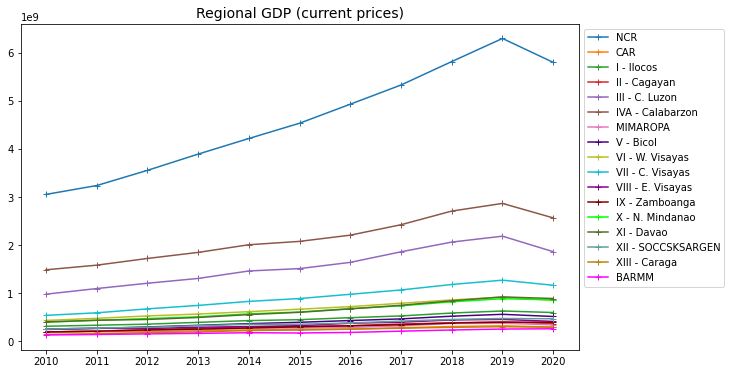

In [13]:
plt.figure(figsize=(10,6))
for i,j in enumerate(labels):
    df = df_current[df_current['Region']==j]
    plt.plot(df['Year'], df['Gross Regional Domestic Product'],
             '+-', label=j, color=colors[i])
plt.title('Regional GDP (current prices)', fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2021));

# Plot regional GDP at highest peak (year 2019)

In [14]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [15]:
regions = gpd.GeoDataFrame.from_file('Original/Regions.shp')
psgg_code = pd.read_csv('psgg_codes.csv', dtype=object)

In [16]:
regions = gpd.GeoDataFrame.from_file('Original/Regions.shp')

In [17]:
regions

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


# Projected GDP in 2021-2026 from Statista

https://www.statista.com/statistics/578705/gross-domestic-product-gdp-growth-rate-in-philippines/

“Over the next five years, the annual rate of GDP growth is set to rise to an average of 6.7%. However, between 2026 and 2035, CEBR forecasts that the average rate of GDP growth will dip slightly to 6.5% per year,"
the CEBR said.

https://www.bworldonline.com/editors-picks/2020/12/29/336409/philippines-poised-to-be-22nd-biggest-economy-in-the-world-by-2035-cebr/

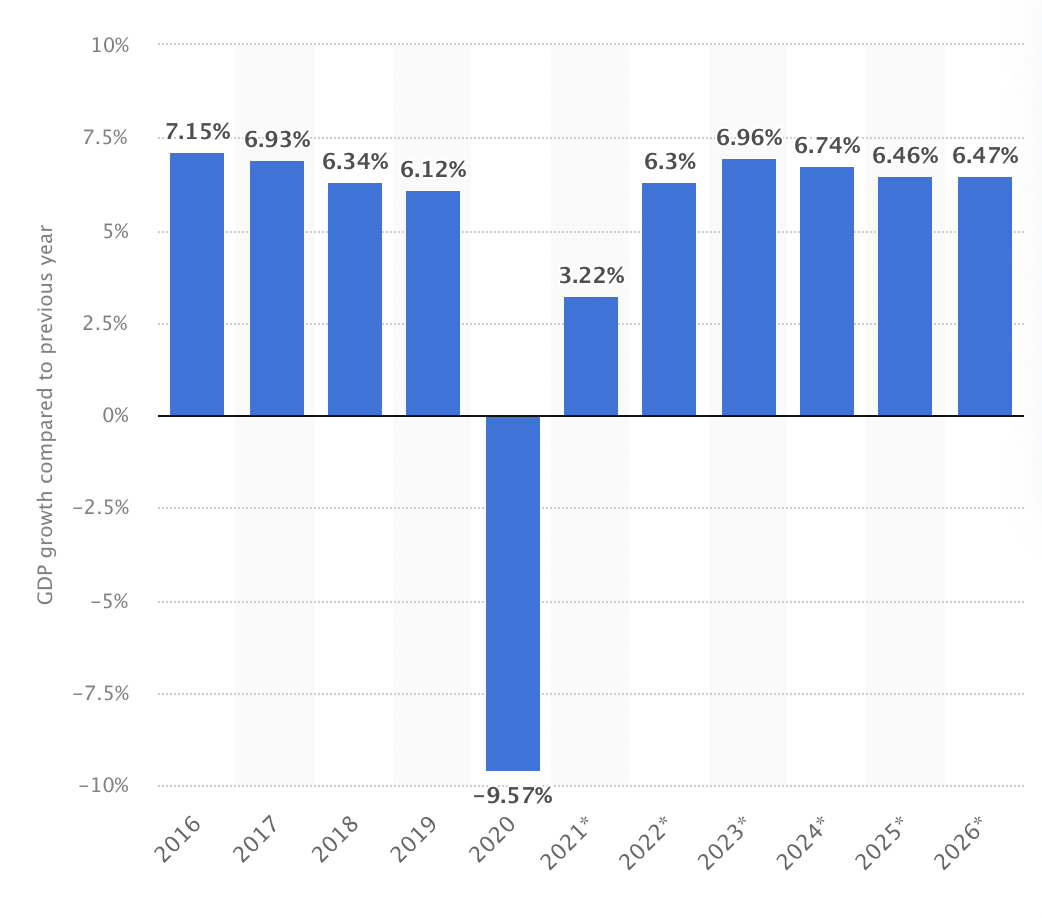

In [18]:
growth = {2021: 3.22,
          2022: 6.30,
          2023: 6.96,
          2024: 6.74,
          2025: 6.46,
          2026: 6.47,
          2027: 6.50,
          2028: 6.50,
          2029: 6.50,
          2030: 6.50}

year = np.arange(2021, 2031)
year

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

In [19]:
df_2020 = df_current[df_current['Year'] == 2020][['Region', 'Year', 'Gross Regional Domestic Product']]

In [20]:
df_2020['Region'].unique()

array(['NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN',
       'XIII - Caraga', 'BARMM'], dtype=object)

In [21]:
year = np.arange(2021,2031)
year

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

In [22]:
df_2020['GDP_2021'] = df_2020.apply(lambda x: x['Gross Regional Domestic Product'] + 
                        (x['Gross Regional Domestic Product']*(3.22/100)), axis=1)


In [23]:
df_2020['GDP_2022'] = df_2020.apply(lambda x: x['GDP_2021'] + 
                                (x['GDP_2021']*(6.30/100)), axis=1)

In [24]:
df_2020['GDP_2023'] = df_2020.apply(lambda x: x['GDP_2022'] + 
                                (x['GDP_2022']*(6.96/100)), axis=1)

In [25]:
df_2020['GDP_2024'] = df_2020.apply(lambda x: x['GDP_2023'] + 
                                (x['GDP_2023']*(6.74/100)), axis=1)

In [26]:
df_2020['GDP_2025'] = df_2020.apply(lambda x: x['GDP_2024'] + 
                                (x['GDP_2024']*(6.46/100)), axis=1)

In [27]:
df_2020['GDP_2026'] = df_2020.apply(lambda x: x['GDP_2025'] + 
                                (x['GDP_2025']*(6.47/100)), axis=1)

df_2020['GDP_2027'] = df_2020.apply(lambda x: x['GDP_2026'] + 
                                (x['GDP_2026']*(6.5/100)), axis=1)

df_2020['GDP_2028'] = df_2020.apply(lambda x: x['GDP_2027'] + 
                                (x['GDP_2027']*(6.5/100)), axis=1)

df_2020['GDP_2029'] = df_2020.apply(lambda x: x['GDP_2028'] + 
                                (x['GDP_2028']*(6.5/100)), axis=1)

df_2020['GDP_2030'] = df_2020.apply(lambda x: x['GDP_2029'] + 
                                (x['GDP_2029']*(6.5/100)), axis=1)

In [28]:
df_2020.columns

Index(['Region', 'Year', 'Gross Regional Domestic Product', 'GDP_2021',
       'GDP_2022', 'GDP_2023', 'GDP_2024', 'GDP_2025', 'GDP_2026', 'GDP_2027',
       'GDP_2028', 'GDP_2029', 'GDP_2030'],
      dtype='object')

In [29]:
df_2020

,Region,Year,Gross Regional Domestic Product,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025,GDP_2026,GDP_2027,GDP_2028,GDP_2029,GDP_2030
340,NCR,2020,5.797058e+09,5.983724e+09,6.360698e+09,6.803403e+09,7.261952e+09,7.731074e+09,8.231275e+09,8.766308e+09,9.336118e+09,9.942965e+09,1.058926e+10
341,CAR,2020,2.965233e+08,3.060714e+08,3.253539e+08,3.479985e+08,3.714536e+08,3.954495e+08,4.210351e+08,4.484024e+08,4.775485e+08,5.085892e+08,5.416475e+08
342,I - Ilocos,2020,5.979816e+08,6.172366e+08,6.561225e+08,7.017887e+08,7.490892e+08,7.974804e+08,8.490774e+08,9.042674e+08,9.630448e+08,1.025643e+09,1.092309e+09
343,II - Cagayan,2020,3.670957e+08,3.789162e+08,4.027879e+08,4.308220e+08,4.598594e+08,4.895663e+08,5.212412e+08,5.551219e+08,5.912048e+08,6.296331e+08,6.705593e+08
344,III - C. Luzon,2020,1.862908e+09,1.922894e+09,2.044036e+09,2.186301e+09,2.333658e+09,2.484412e+09,2.645153e+09,2.817088e+09,3.000199e+09,3.195212e+09,3.402901e+09
345,IVA - Calabarzon,2020,2.565124e+09,2.647721e+09,2.814528e+09,3.010419e+09,3.213321e+09,3.420902e+09,3.642234e+09,3.878979e+09,4.131113e+09,4.399635e+09,4.685612e+09
346,MIMAROPA,2020,3.419833e+08,3.529951e+08,3.752338e+08,4.013501e+08,4.284011e+08,4.560758e+08,4.855839e+08,5.171469e+08,5.507614e+08,5.865609e+08,6.246873e+08
347,V - Bicol,2020,5.157937e+08,5.324023e+08,5.659436e+08,6.053333e+08,6.461328e+08,6.878730e+08,7.323783e+08,7.799829e+08,8.306818e+08,8.846761e+08,9.421801e+08
348,VI - W. Visayas,2020,8.507467e+08,8.781408e+08,9.334637e+08,9.984327e+08,1.065727e+09,1.134573e+09,1.207980e+09,1.286499e+09,1.370121e+09,1.459179e+09,1.554026e+09
349,VII - C. Visayas,2020,1.164719e+09,1.202223e+09,1.277963e+09,1.366909e+09,1.459039e+09,1.553293e+09,1.653791e+09,1.761288e+09,1.875771e+09,1.997696e+09,2.127547e+09


In [30]:
df_forecast = df_2020.melt(id_vars = 'Region',
             value_vars = ['GDP_2021','GDP_2022', 'GDP_2023', 'GDP_2024',
                        'GDP_2025', 'GDP_2026', 'GDP_2027', 'GDP_2028',
                        'GDP_2029', 'GDP_2030'])

In [31]:
df_forecast['year'] = df_forecast['variable'].apply(lambda x: int(x[-4:]))

In [32]:
df_forecast = df_forecast[['Region', 'value', 'year']]
df_forecast.columns = ['Region', 'Gross Regional Domestic Product', 'Year']

In [33]:
df_forecast

,Region,Gross Regional Domestic Product,Year
0,NCR,5.983724e+09,2021
1,CAR,3.060714e+08,2021
2,I - Ilocos,6.172366e+08,2021
3,II - Cagayan,3.789162e+08,2021
4,III - C. Luzon,1.922894e+09,2021
...,...,...,...
165,X - N. Mindanao,1.573680e+09,2030
166,XI - Davao,1.624737e+09,2030
167,XII - SOCCSKSARGEN,8.547046e+08,2030
168,XIII - Caraga,5.327731e+08,2030


In [34]:
df_current = df_current[['Region', 'Year', 'Gross Regional Domestic Product']]
df_current

,Region,Year,Gross Regional Domestic Product
170,NCR,2010,3.053160e+09
171,CAR,2010,1.897668e+08
172,I - Ilocos,2010,3.126284e+08
173,II - Cagayan,2010,1.928803e+08
174,III - C. Luzon,2010,9.792877e+08
...,...,...,...
352,X - N. Mindanao,2020,8.615065e+08
353,XI - Davao,2020,8.894577e+08
354,XII - SOCCSKSARGEN,2020,4.679055e+08
355,XIII - Caraga,2020,2.916651e+08


In [35]:
df_all = pd.concat([df_current,df_forecast])

In [36]:
df_all.tail()

,Region,Year,Gross Regional Domestic Product
165,X - N. Mindanao,2030,1.573680e+09
166,XI - Davao,2030,1.624737e+09
167,XII - SOCCSKSARGEN,2030,8.547046e+08
168,XIII - Caraga,2030,5.327731e+08
169,BARMM,2030,4.753958e+08


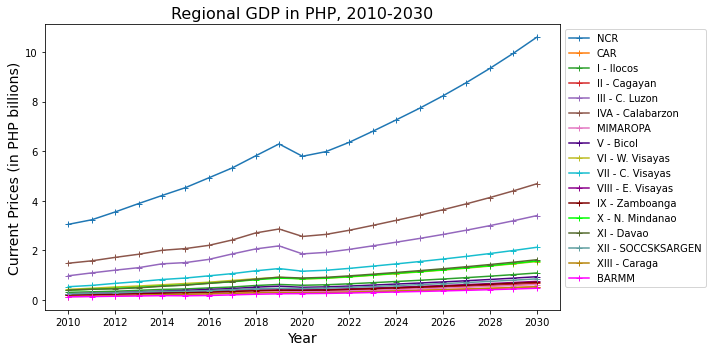

In [37]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):

    df = df_all[df_all['Region']==j]
    plt.plot(df['Year'], df['Gross Regional Domestic Product']/1_000_000_000,
             '+-', label=j, color=colors[i])
    
plt.title('Regional GDP (current prices)', fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.title('Regional GDP in PHP, 2010-2030', fontsize=16)
plt.ylabel('Current Prices (in PHP billions)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('regional_gdp.png', dpi=300);

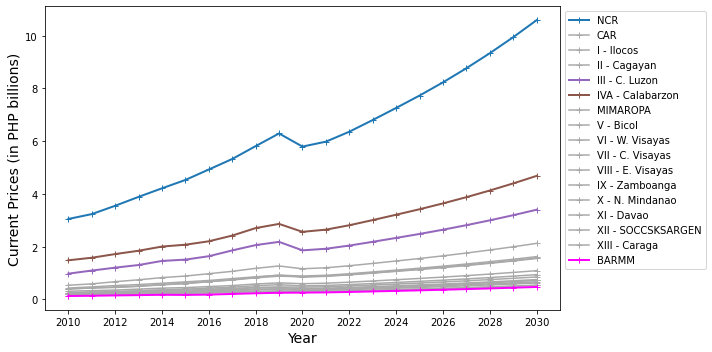

In [38]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_all[df_all['Region']==j]
    if j in ['NCR', 'IVA - Calabarzon', 'III - C. Luzon', 'BARMM']:
        
        plt.plot(df['Year'], df['Gross Regional Domestic Product']/1_000_000_000,
             '+-', label=j, color=colors[i], lw=2)
    else:
          plt.plot(df['Year'], df['Gross Regional Domestic Product']/1_000_000_000,
             '+-', label=j, color='darkgrey')
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
# plt.title('Regional GDP in PHP, 2010-2030', fontsize=16)
plt.ylabel('Current Prices (in PHP billions)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_regional_gdp.png', dpi=300);

In [39]:
df_all['GDP_log'] = np.log(df_all['Gross Regional Domestic Product'])

In [40]:
df_all[df_all['Year']==2030].sort_values(by='Gross Regional Domestic Product')

,Region,Year,Gross Regional Domestic Product,GDP_log
169,BARMM,2030,4.753958e+08,19.979658
168,XIII - Caraga,2030,5.327731e+08,20.093606
154,CAR,2030,5.416475e+08,20.110126
159,MIMAROPA,2030,6.246873e+08,20.252762
156,II - Cagayan,2030,6.705593e+08,20.323623
164,IX - Zamboanga,2030,7.207412e+08,20.395791
163,VIII - E. Visayas,2030,7.549435e+08,20.442153
167,XII - SOCCSKSARGEN,2030,8.547046e+08,20.566266
160,V - Bicol,2030,9.421801e+08,20.663707
155,I - Ilocos,2030,1.092309e+09,20.811560


In [41]:
regions['Region'] = ['BARMM', 'V - Bicol', 'IVA - Calabarzon', 'II - Cagayan',
                    'XIII - Caraga', 'III - C. Luzon', 'VII - C. Visayas',
                    'CAR', 'XI - Davao', 'VIII - E. Visayas', 'I - Ilocos',
                    'MIMAROPA', 'NCR', 'X - N. Mindanao', 'XII - SOCCSKSARGEN',
                    'VI - W. Visayas', 'IX - Zamboanga']

In [42]:
regions

,REGION,geometry,Region
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4...",BARMM
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ...",V - Bicol
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ...",IVA - Calabarzon
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ...",II - Cagayan
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7...",XIII - Caraga
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ...",III - C. Luzon
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9...",VII - C. Visayas
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939...",CAR
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5...",XI - Davao
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9...",VIII - E. Visayas


In [43]:
df_geo = regions.merge(df_all[df_all['Year'] == 2030][['Region', 'GDP_log']], on='Region')

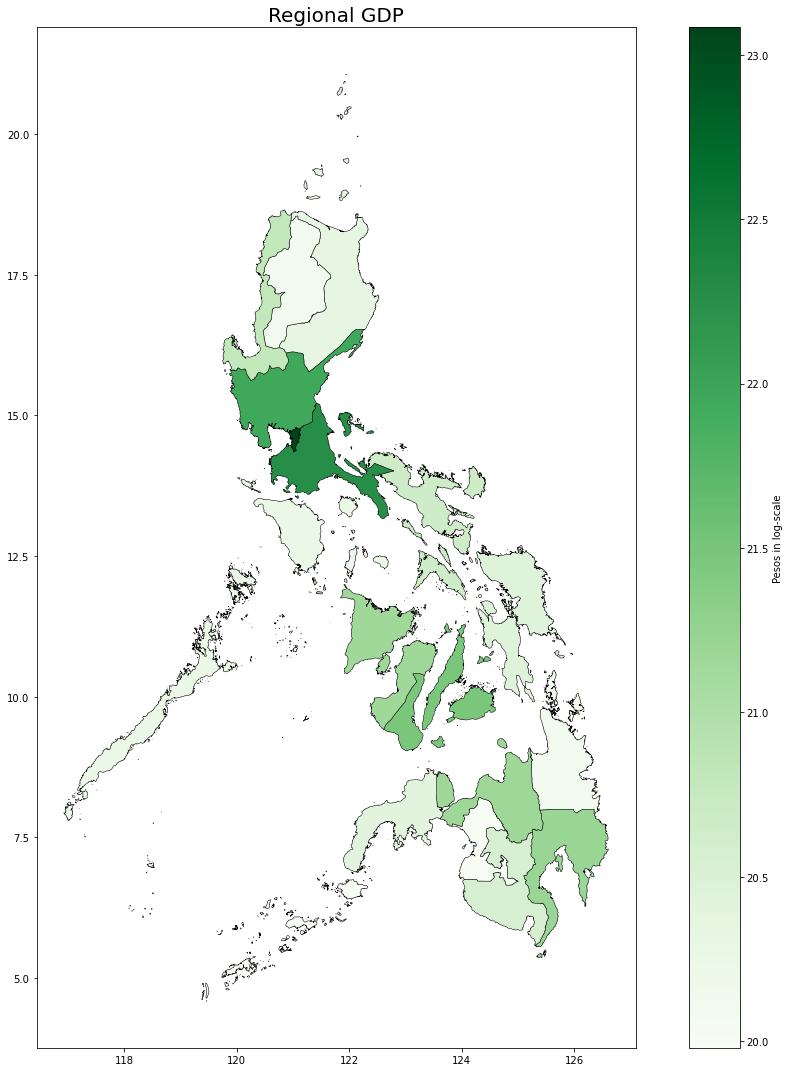

In [44]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
plt.title('Regional GDP', fontsize=20)
df_geo.plot(column='GDP_log',
            figsize=(10,10),
            cmap='Greens',
            edgecolor='black',
            linewidth=0.5,
            legend=True,
            legend_kwds = {'label': 'Pesos in log-scale'},
             ax=ax)
plt.tight_layout()
plt.savefig('map_gdp2030.png', dpi=300)



In [45]:
df_all.to_csv('~/cpt5/capstone/data/processed/regional_GDP_projected.csv')